# Questionário Escalonamento 1.3

Questão 4

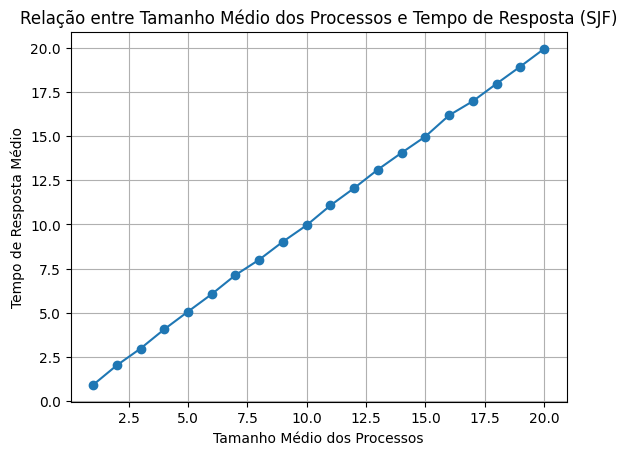

In [170]:
import numpy as np
import matplotlib.pyplot as plt


tamanhos_medios = np.arange(1, 21)  # Vai de 1 a 20
tempos_resposta_medios = []

for tamanho_medio in tamanhos_medios:
    tamanhos_processos = np.random.randint(tamanho_medio - 1, tamanho_medio + 2, size=100)
    tempo_resposta_medio = np.mean(np.sort(tamanhos_processos))
    tempos_resposta_medios.append(tempo_resposta_medio)

plt.plot(tamanhos_medios, tempos_resposta_medios, marker='o')
plt.title('Relação entre Tamanho Médio dos Processos e Tempo de Resposta (SJF)')
plt.xlabel('Tamanho Médio dos Processos')
plt.ylabel('Tempo de Resposta Médio')
plt.grid(True)
plt.show()


# Questionário Escalonamento 1.3

Questão 5

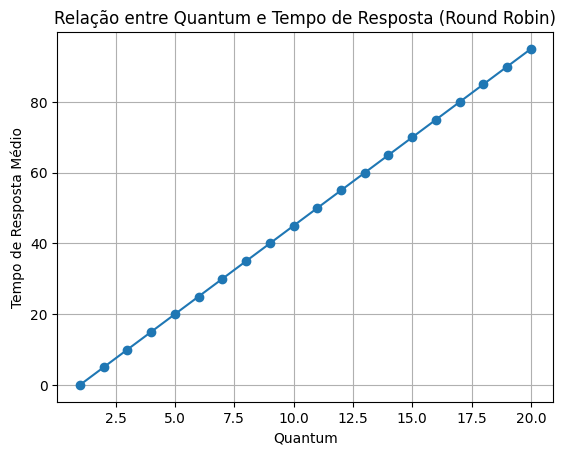

In [171]:
import numpy as np
import matplotlib.pyplot as plt

quantum_values = np.arange(1, 21) 

# Função para calcular o tempo de resposta médio dado o quantum
def calcular_tempo_resposta_medio(quantum, num_processos):
    tamanho_processos = 10
    tempo_resposta_medio = (quantum - 1) * (num_processos / 2)
    
    return tempo_resposta_medio

num_processos = 10

tempos_resposta_medios = [calcular_tempo_resposta_medio(q, num_processos) for q in quantum_values]


plt.plot(quantum_values, tempos_resposta_medios, marker='o')
plt.title('Relação entre Quantum e Tempo de Resposta (Round Robin)')
plt.xlabel('Quantum')
plt.ylabel('Tempo de Resposta Médio')
plt.grid(True)
plt.show()


### Laboratorio de Escalonamento ###

Neste laboratório, iremos simular o funcionamento de algoritmos de escalonamento básicos para entender melhor seu funcionamento.

Na célula abaixo, temos uma classe Processo, que tem as informações de execução, e uma classe de exemplo de escalonamento apenas com os protótipos:

(orientação a objeto em Python)




1 - Altere o simulador acima para calcular o tempo de execucao medio e tempo de resposta 

2 - Implemente o escalonador por FIFO e SJF e verifique seus tempos de execução e espera.

3 - Faça em outra célula uma implementação do STCF e Round Robin, alterando o p.roda() para receber o quantum


In [172]:
def mergesort(array):
    if len(array) <= 1:
        return array

    meio = len(array) // 2
    esquerda = mergesort(array[:meio])
    direita = mergesort(array[meio:])

    return merge(esquerda, direita)


def merge(esquerda, direita):
    result = []
    i, j = 0, 0
    while i < len(esquerda) and j < len(direita):
        if esquerda[i] <= direita[j]:
            result.append(esquerda[i])
            i += 1
        else:
            result.append(direita[j])
            j += 1

    result += esquerda[i:]
    result += direita[j:]

    return result


# Questão 1

In [173]:
import numpy as np
import random

class Processo(object):
    def __init__(self, pnome, pio, ptam, prioridade, tempoChegada):
        self.nome = pnome
        self.io = pio
        self.tam = ptam
        self.prio = prioridade
        self.chegada = tempoChegada
        self.inicio_execucao = None  #  Hora de início da execução
        self.tempo_resposta = None  # Tempo de resposta
        self.tempo_conclusao = None  # Hora de conclusão da execução
        self.resposta = -1

    def roda(self, quantum=None):
        if random.randint(1, 100) < self.io:
            self.tam -= 1
            print(self.nome, "fez E/S, falta", self.tam)
            return 1, True

        if quantum is None or self.tam < quantum:
            quantum = self.tam
        self.tam -= quantum
        
        if self.inicio_execucao is None:  
            self.inicio_execucao = tempo
        
        print(self.nome, "rodou por", quantum, "timeslice, faltam", self.tam)
        
        if self.tam == 0:  
            self.tempo_conclusao = tempo
            self.tempo_resposta = self.inicio_execucao - self.chegada
        
        return quantum, False

class escalonador_FIFO(object):
    def __init__(self, vprontos=[]):
        self.prontos = vprontos

    def pronto(self, processo):
        self.prontos.append(processo)

    def proximo(self):
        if len(self.prontos) > 0:
            return self.prontos.pop(0)
        else:
            return None
 

nprocs = 4
nomes = ['A', 'B', 'C', 'D']
chanceio = [0, 0, 0, 0]
tamanho = np.array([3, 3, 3, 3])

total = tamanho.sum()


procs = []
for i in range(nprocs):
    procs.append(Processo(nomes[i], chanceio[i], tamanho[i], 0, 0))

quantum = 2
tempoBloq = 1

escalonador = escalonador_FIFO(procs)
bloqueados = []

tempo = 0
tempoResposta = np.array([])
tempoExecucao = np.array([])

random.seed(0)

while total > 0:
    p = escalonador.proximo()
    if p is not None:
        rodou, fezIo = p.roda(quantum)
        if(fezIo and p.tam>0):
            bloqueados.append([p,tempoBloq+1]) #Adiciona o processo que fez e/s aos bloqueados
        elif(p.tam>0):
            escalonador.pronto(p)
        total-=rodou
        if(p.resposta == -1):
            tempoResposta = np.append(tempoResposta,tempo)
            p.resposta = tempo
        tempo+=rodou
        if(p.tam==0):
            tempoExecucao = np.append(tempoExecucao,(tempo-p.resposta))
    else:
        tempo += 1
    if(len(bloqueados)>0):
        for i in bloqueados:
            i[1]-=1
            if(i[1]==0):
                escalonador.pronto(i[0])
                del i  

print("\ntempo de resposta medio: ",tempoResposta.sum()/nprocs)
print("tempo de execucao medio: ",tempoExecucao.sum()/nprocs)
print("Unfairness: ",tempoExecucao[0]/tempoExecucao[1])

A rodou por 2 timeslice, faltam 1
B rodou por 2 timeslice, faltam 1
C rodou por 2 timeslice, faltam 1
D rodou por 2 timeslice, faltam 1
A rodou por 1 timeslice, faltam 0
B rodou por 1 timeslice, faltam 0
C rodou por 1 timeslice, faltam 0
D rodou por 1 timeslice, faltam 0

tempo de resposta medio:  3.0
tempo de execucao medio:  7.5
Unfairness:  1.125


# Questão 2

FIFO

In [174]:
import numpy as np
import random

class Processo(object):
    def __init__(self, pnome, pio, ptam, prioridade, tempoChegada):
        self.nome = pnome
        self.io = pio
        self.tam = ptam
        self.prio = prioridade
        self.chegada = tempoChegada
        self.inicio_execucao = None  #  Hora de início da execução
        self.tempo_resposta = None  # Tempo de resposta
        self.tempo_conclusao = None  # Hora de conclusão da execução
        self.resposta = -1

    def roda(self, quantum=None):
        if random.randint(1, 100) < self.io:
            self.tam -= 1
            print(self.nome, "fez E/S, falta", self.tam)
            return 1, True

        if quantum is None or self.tam < quantum:
            quantum = self.tam
        self.tam -= quantum
        
        if self.inicio_execucao is None:  # Novo: Registre o tempo de início da execução
            self.inicio_execucao = tempo
        
        print(self.nome, "rodou por", quantum, "timeslice, faltam", self.tam)
        
        if self.tam == 0:  # Novo: Registre o tempo de conclusão da execução
            self.tempo_conclusao = tempo
            self.tempo_resposta = self.inicio_execucao - self.chegada
        
        return quantum, False

   
class escalonador_FIFO(object):
    def __init__(self, vprontos=[]):
        self.prontos = vprontos

    def pronto(self, processo):
        self.prontos.append(processo)

    def proximo(self):
        if len(self.prontos) > 0:
            return self.prontos.pop(0)
        else:
            return None

nprocs = 4
nomes = ['A', 'B', 'C', 'D']
chanceio = [0, 0, 0, 0]
tamanho = np.array([3, 3, 3, 3])

total = tamanho.sum()


procs = []
for i in range(nprocs):
    procs.append(Processo(nomes[i], chanceio[i], tamanho[i], 0, 0))

quantum = 2
prio = 0  
tempoBloq = 1

escalonador = escalonador_FIFO(procs)
bloqueados = []

tempo = 0
tempoResposta = np.array([])
tempoExecucao = np.array([])

random.seed(0)

while total > 0:
    p = escalonador.proximo()
    if p is not None:
        rodou, fezIo = p.roda(quantum)
        if(fezIo and p.tam>0):
            bloqueados.append([p,tempoBloq+1]) #Adiciona o processo que fez e/s aos bloqueados
        elif(p.tam>0):
            escalonador.pronto(p)
        total-=rodou
        if(p.resposta == -1):
            tempoResposta = np.append(tempoResposta,tempo)
            p.resposta = tempo
        tempo+=rodou
        if(p.tam==0):
            tempoExecucao = np.append(tempoExecucao,(tempo-p.resposta))
    else:
        tempo += 1
    if(len(bloqueados)>0):
        for i in bloqueados:
            i[1]-=1
            if(i[1]==0):
                escalonador.pronto(i[0])
                del i  

print("\ntempo de resposta medio: ",tempoResposta.sum()/nprocs)
print("tempo de execucao medio: ",tempoExecucao.sum()/nprocs)
print("Unfairness: ",tempoExecucao[0]/tempoExecucao[1])

A rodou por 2 timeslice, faltam 1
B rodou por 2 timeslice, faltam 1
C rodou por 2 timeslice, faltam 1
D rodou por 2 timeslice, faltam 1
A rodou por 1 timeslice, faltam 0
B rodou por 1 timeslice, faltam 0
C rodou por 1 timeslice, faltam 0
D rodou por 1 timeslice, faltam 0

tempo de resposta medio:  3.0
tempo de execucao medio:  7.5
Unfairness:  1.125


# Questão 2

SJF

In [175]:
import numpy as np
import random

class Processo(object):
    def __init__(self, pnome, pio, ptam, prioridade, tempoChegada):
        self.nome = pnome
        self.io = pio
        self.tam = ptam
        self.prio = prioridade
        self.chegada = tempoChegada
        self.inicio_execucao = None  #  Hora de início da execução
        self.tempo_resposta = None  # Tempo de resposta
        self.tempo_conclusao = None  # Hora de conclusão da execução
        self.resposta = -1

    def roda(self, quantum=None):
        if random.randint(1, 100) < self.io:
            self.tam -= 1
            print(self.nome, "fez E/S, falta", self.tam)
            return 1, True

        if quantum is None or self.tam < quantum:
            quantum = self.tam
        self.tam -= quantum
        
        if self.inicio_execucao is None:  # Novo: Registre o tempo de início da execução
            self.inicio_execucao = tempo
        
        print(self.nome, "rodou por", quantum, "timeslice, faltam", self.tam)
        
        if self.tam == 0:  # Novo: Registre o tempo de conclusão da execução
            self.tempo_conclusao = tempo
            self.tempo_resposta = self.inicio_execucao - self.chegada
        
        return quantum, False

class escalonador_SJF(object):
    def __init__(self, vprontos=[]):
        self.prontos = vprontos

    def pronto(self, processo):
        # Insere o processo na fila de prontos, ordenada pelo tamanho (tempo de execução)
        self.prontos.append(processo)
        self.prontos.sort(key=lambda x: x.tam)

    def proximo(self):
        if len(self.prontos) > 0:
            return self.prontos.pop(0)
        else:
            return None

    

nprocs = 4
nomes = ['A', 'B', 'C', 'D']
chanceio = [0, 0, 0, 0]
tamanho = np.array([3, 3, 3, 3])

total = tamanho.sum()


procs = []
for i in range(nprocs):
    procs.append(Processo(nomes[i], chanceio[i], tamanho[i], 0, 0))

quantum = 2
tempoBloq = 1

escalonador = escalonador_SJF(procs)
bloqueados = []

tempo = 0
tempoResposta = np.array([])
tempoExecucao = np.array([])

random.seed(0)

while total > 0:
    p = escalonador.proximo()
    if p is not None:
        rodou, fezIo = p.roda(quantum)
        if(fezIo and p.tam>0):
            bloqueados.append([p,tempoBloq+1]) #Adiciona o processo que fez e/s aos bloqueados
        elif(p.tam>0):
            escalonador.pronto(p)
        total-=rodou
        if(p.resposta == -1):
            tempoResposta = np.append(tempoResposta,tempo)
            p.resposta = tempo
        tempo+=rodou
        if(p.tam==0):
            tempoExecucao = np.append(tempoExecucao,(tempo-p.resposta))
    else:
        tempo += 1
    if(len(bloqueados)>0):
        for i in bloqueados:
            i[1]-=1
            if(i[1]==0):
                escalonador.pronto(i[0])
                del i  

print("\nTempo de resposta medio: ",tempoResposta.sum()/nprocs)
print("tempo de execucao medio: ",tempoExecucao.sum()/nprocs)
print("Unfairness: ",tempoExecucao[0]/tempoExecucao[1])

A rodou por 2 timeslice, faltam 1
A rodou por 1 timeslice, faltam 0
B rodou por 2 timeslice, faltam 1
B rodou por 1 timeslice, faltam 0
C rodou por 2 timeslice, faltam 1
C rodou por 1 timeslice, faltam 0
D rodou por 2 timeslice, faltam 1
D rodou por 1 timeslice, faltam 0

Tempo de resposta medio:  4.5
tempo de execucao medio:  3.0
Unfairness:  1.0


# Questão 3

Round Robin

In [176]:
import numpy as np
import random

class Processo(object):
    def __init__(self, pnome, pio, ptam, prioridade, tempoChegada):
        self.nome = pnome
        self.io = pio
        self.tam = ptam
        self.prio = prioridade
        self.chegada = tempoChegada
        self.inicio_execucao = None  #  Hora de início da execução
        self.tempo_resposta = None  # Tempo de resposta
        self.tempo_conclusao = None  # Hora de conclusão da execução
        self.resposta = -1

    def roda(self, quantum=None):
        if random.randint(1, 100) < self.io:
            self.tam -= 1
            print(self.nome, "fez E/S, falta", self.tam)
            return 1, True

        if quantum is None or self.tam < quantum:
            quantum = self.tam
        self.tam -= quantum
        
        if self.inicio_execucao is None:  
            self.inicio_execucao = tempo
        
        print(self.nome, "rodou por", quantum, "timeslice, faltam", self.tam)
        
        if self.tam == 0:  
            self.tempo_conclusao = tempo
            self.tempo_resposta = self.inicio_execucao - self.chegada
        
        return quantum, False

class escalonador_round_robin(object):
    def __init__(self,vprontos):
        self.prontos = vprontos

    def pronto(self,Processo):
        self.prontos.append(Processo)
        
    def proximo(self):
        if(len(self.prontos)==0):
            return None
        p = self.prontos[0]
        del self.prontos[0]
        return p
 

nprocs = 4
nomes = ['A', 'B', 'C', 'D']
chanceio = [0, 0, 0, 0]
tamanho = np.array([3, 3, 3, 3])

total = tamanho.sum()


procs = []
for i in range(nprocs):
    procs.append(Processo(nomes[i], chanceio[i], tamanho[i], 0, 0))

quantum = 2
tempoBloq = 1

escalonador = escalonador_round_robin(procs)
bloqueados = []

tempo = 0
tempoResposta = np.array([])
tempoExecucao = np.array([])

random.seed(0)

while total > 0:
    p = escalonador.proximo()
    if p is not None:
        rodou, fezIo = p.roda(quantum)
        if(fezIo and p.tam>0):
            bloqueados.append([p,tempoBloq+1]) #Adiciona o processo que fez e/s aos bloqueados
        elif(p.tam>0):
            escalonador.pronto(p)
        total-=rodou
        if(p.resposta == -1):
            tempoResposta = np.append(tempoResposta,tempo)
            p.resposta = tempo
        tempo+=rodou
        if(p.tam==0):
            tempoExecucao = np.append(tempoExecucao,(tempo-p.resposta))
    else:
        tempo += 1
    if(len(bloqueados)>0):
        for i in bloqueados:
            i[1]-=1
            if(i[1]==0):
                escalonador.pronto(i[0])
                del i  

print("\nTempo de resposta medio: ",tempoResposta.sum()/nprocs)
print("tempo de execucao medio: ",tempoExecucao.sum()/nprocs)
print("Unfairness: ",tempoExecucao[0]/tempoExecucao[1])

A rodou por 2 timeslice, faltam 1
B rodou por 2 timeslice, faltam 1
C rodou por 2 timeslice, faltam 1
D rodou por 2 timeslice, faltam 1
A rodou por 1 timeslice, faltam 0
B rodou por 1 timeslice, faltam 0
C rodou por 1 timeslice, faltam 0
D rodou por 1 timeslice, faltam 0

Tempo de resposta medio:  3.0
tempo de execucao medio:  7.5
Unfairness:  1.125


# Questão 3

STCF

In [177]:
import numpy as np
import random
import heapq

class Processo(object):
    def __init__(self, pnome, pio, ptam, prioridade, tempoChegada):
        self.nome = pnome
        self.io = pio
        self.tam = ptam
        self.prio = prioridade
        self.chegada = tempoChegada
        self.inicio_execucao = None  #  Hora de início da execução
        self.tempo_resposta = None  # Tempo de resposta
        self.tempo_conclusao = None  # Hora de conclusão da execução
        self.resposta = -1

    def roda(self, quantum=None):
        if random.randint(1, 100) < self.io:
            self.tam -= 1
            print(self.nome, "fez E/S, falta", self.tam)
            return 1, True

        if quantum is None or self.tam < quantum:
            quantum = self.tam
        self.tam -= quantum
        
        if self.inicio_execucao is None:  # Novo: Registre o tempo de início da execução
            self.inicio_execucao = tempo
        
        print(self.nome, "rodou por", quantum, "timeslice, faltam", self.tam)
        
        if self.tam == 0:  # Novo: Registre o tempo de conclusão da execução
            self.tempo_conclusao = tempo
            self.tempo_resposta = self.inicio_execucao - self.chegada
        
        return quantum, False
    
    def __lt__(self, outro):
        # Este método compara dois processos com base em seu tempo restante (tam)
        return self.tam < outro.tam


class escalonador_STCF(object):
    def __init__(self, vprontos=[]):
        self.prontos = [(p.tam, p) for p in vprontos]

    def pronto(self, processo):
        # Insere uma tupla contendo o tempo restante e o processo na fila de prioridade
        heapq.heappush(self.prontos, (processo.tam, processo))

    def proximo(self):
        if len(self.prontos) > 0:
            _, processo = heapq.heappop(self.prontos)
            return processo
        else:
            return None
    

nprocs = 4
nomes = ['A', 'B', 'C', 'D']
chanceio = [0, 0, 0, 0]
tamanho = np.array([3, 3, 3, 3])

total = tamanho.sum()


procs = []
for i in range(nprocs):
    procs.append(Processo(nomes[i], chanceio[i], tamanho[i], 0, 0))

quantum = 2
tempoBloq = 1

escalonador = escalonador_STCF(procs)
bloqueados = []

tempo = 0
tempoResposta = np.array([])
tempoExecucao = np.array([])

random.seed(0)

while total > 0:
    p = escalonador.proximo()
    if p is not None:
        rodou, fezIo = p.roda(quantum)
        if(fezIo and p.tam>0):
            bloqueados.append([p,tempoBloq+1]) #Adiciona o processo que fez e/s aos bloqueados
        elif(p.tam>0):
            escalonador.pronto(p)
        total-=rodou
        if(p.resposta == -1):
            tempoResposta = np.append(tempoResposta,tempo)
            p.resposta = tempo
        tempo+=rodou
        if(p.tam==0):
            tempoExecucao = np.append(tempoExecucao,(tempo-p.resposta))
    else:
        tempo += 1
    if(len(bloqueados)>0):
        for i in bloqueados:
            i[1]-=1
            if(i[1]==0):
                escalonador.pronto(i[0])
                del i  

print("\nTempo de resposta medio: ",tempoResposta.sum()/nprocs)
print("tempo de execucao medio: ",tempoExecucao.sum()/nprocs)
print("Unfairness: ",tempoExecucao[0]/tempoExecucao[1])

A rodou por 2 timeslice, faltam 1
A rodou por 1 timeslice, faltam 0
D rodou por 2 timeslice, faltam 1
D rodou por 1 timeslice, faltam 0
B rodou por 2 timeslice, faltam 1
B rodou por 1 timeslice, faltam 0
C rodou por 2 timeslice, faltam 1
C rodou por 1 timeslice, faltam 0

Tempo de resposta medio:  4.5
tempo de execucao medio:  3.0
Unfairness:  1.0
